<font size=6>Support Vector Machines</font><br>
<font size=5>Autor: <font color="#2890f9"> William Mendez <br></font>
<font size=3>GitHub: <font color="#A371F7"> @WilliamMendez <br></font>
<font size=3>Cuenta uniandes: <font color="#FFF200"> w.mendez</font>

Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

Cargamos los datos y los revisamos

In [3]:
data = pd.read_csv('data/datos_convertidos.csv')

In [4]:
data.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,0,0,0,0,0,0,1,60,0,0,1,3,8.0,0,0,0,0
1,1,28.75,0,0,0,0,2,0,1,55,0,0,1,3,7.0,0,0,0,0
2,2,19.90,1,0,0,0,1,0,1,65,0,0,1,2,7.0,0,0,0,0
3,3,28.06,0,0,0,1,1,0,0,65,0,1,1,2,8.0,0,0,0,0
4,4,29.29,1,0,0,0,1,0,0,70,0,0,1,3,7.0,1,0,0,0


In [5]:
data.describe()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.00000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000
mean,33783.843779,28.300153,0.437163,0.067540,0.076042,3.430666,3.941559,0.139558,0.535346,64.663510,0.71665,0.225038,0.776530,2.609901,7.102267,0.132624,0.037092,0.094337,0.086094
std,19500.423273,6.211283,0.496040,0.250958,0.265067,8.100786,8.117292,0.346530,0.574922,7.464508,1.45877,0.510276,0.416574,1.025881,1.408602,0.339171,0.188988,0.292299,0.280506
min,0.000000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16885.250000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.00000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,33829.500000,27.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.00000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,50690.750000,31.190000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,65.000000,1.00000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,67499.000000,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,2.000000,80.000000,5.00000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.dtypes

Index                 int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease          int64
dtype: object

In [7]:
data.isnull().mean()

Index               0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
HeartDisease        0.0
dtype: float64

Como los datos ya fueron preprocesados podemos empezar con el analisis para implementar el modelo de SVM

<AxesSubplot:title={'center':'# personas que han reportado CHD o MI'}, xlabel='HeartDisease', ylabel='count'>

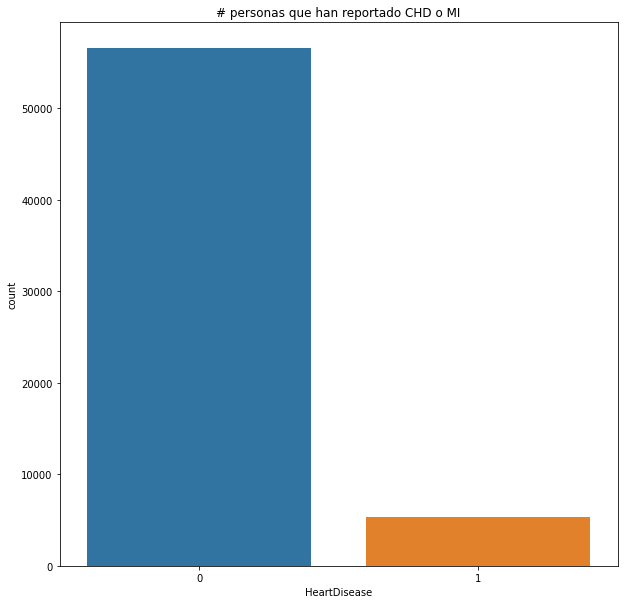

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.title('# personas que han reportado CHD o MI')
sns.countplot(x='HeartDisease', data=data)


<b>Seleccionamos las variables que vamos a utilizar para el modelo </b><br>
Como en el preprocesamiento se transformaron las variables categoricas a numericas, podemos utilizarlas directamente en el modelo

In [9]:
features = list(data.columns)
features.remove('Index')
features.remove('HeartDisease')
print(features)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


Generamos el conjunto de entrenamiento y de prueba

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['HeartDisease'], test_size=0.2, random_state=28)

<AxesSubplot:title={'center':'Distribución de los datos de prueba'}, xlabel='HeartDisease', ylabel='count'>

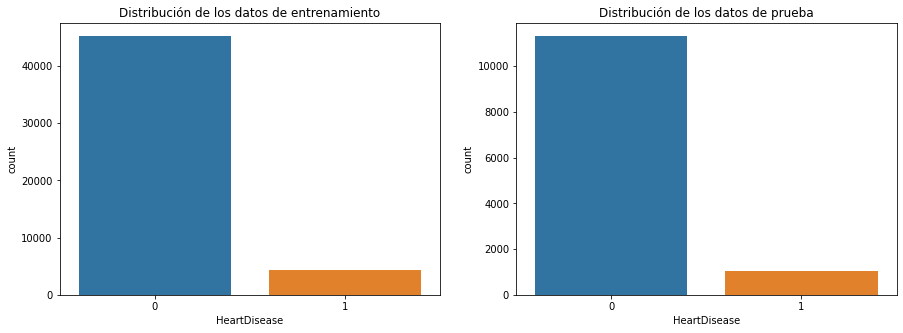

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Distribución de los datos de entrenamiento')
sns.countplot(x=y_train, ax=ax[0])
ax[1].set_title('Distribución de los datos de prueba')
sns.countplot(x=y_test, ax=ax[1])

In [12]:
modeloReferencia = svm.SVC(kernel='poly', degree=3 )

In [13]:
modeloReferencia.fit(x_train, y_train)

SVC(kernel='poly')

In [14]:
pred_train = modeloReferencia.predict(x_train)
pred_test = modeloReferencia.predict(x_test)


In [15]:
print('Accuracy score train: ', accuracy_score(y_train, pred_train))
print('Accuracy score test: ', accuracy_score(y_test, pred_test))

Accuracy score train:  0.9136346188811895
Accuracy score test:  0.914989898989899


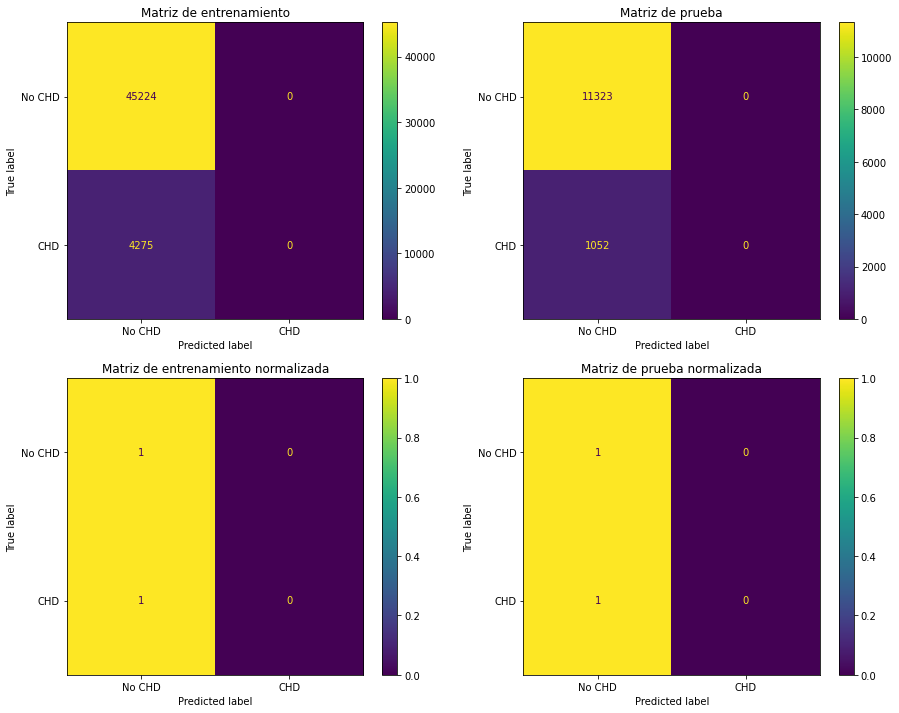

In [16]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)
cm_train_norm = confusion_matrix(y_train, pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, pred_test, normalize='true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
ax1.set_title('Matriz de entrenamiento')
ax2.set_title('Matriz de prueba')
ax3.set_title('Matriz de entrenamiento normalizada')
ax4.set_title('Matriz de prueba normalizada')
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No CHD', 'CHD']).plot(ax=ax1)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No CHD', 'CHD']).plot(ax=ax2)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax3)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax4)

plt.show()

In [17]:
pd.DataFrame([{'Train': accuracy_score(y_train, pred_train), 'Test': accuracy_score(y_test, pred_test)},
              {'Train': precision_score(y_train, pred_train), 'Test': precision_score(y_test, pred_test)}, 
              {'Train': recall_score(y_train, pred_train), 'Test': recall_score(y_test, pred_test)}, 
              {'Train': f1_score(y_train, pred_train), 'Test': f1_score(y_test, pred_test)}
              ], index=['Accuracy', 'Precision', 'Recall', 'F1'])

c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Train,Test
Accuracy,0.913635,0.91499
Precision,0.000000,0.00000
Recall,0.000000,0.00000
F1,0.000000,0.00000


Ahora probaremos con multiples parametros para encontrar el mejor modelo

In [18]:
parametros = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.01, 10, 100], 'gamma': [1, 0.1]}

In [19]:
grid = GridSearchCV(svm.SVC(), parametros, refit=True, verbose=10, n_jobs=-1)

In [20]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
results = pd.DataFrame(grid.cv_results_)
results.head(10)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
best_results = results[[ c for c in results.columns if 'split' in c][1:]].iloc[grid.best_index_].reset_index()
best_results['split'], best_results['set'], best_results['metric'] = zip(*list(best_results['index'].apply(lambda x: x.split('_'))))
best_results.rename(columns = {grid.best_index_: 'value'}, inplace = True)
best_results.drop(columns = 'index', inplace = True)

In [ ]:
best_results.head()

In [ ]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'metric', y = 'value', showmeans = True, data = best_results)